# HR analytics Kaggle

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv as csv

# import scipy and statsmodels libraries to use inbuild stats functions
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

# read the csv file 
hr_df = pd.read_csv('HR_comma_sep.csv')

In [2]:
# some basic data descriptive analysis
print(hr_df.shape)
print(hr_df.columns)
print(hr_df.describe())

(14999, 10)
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233    

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
promotion_last_5years            0.025605        -0.008684       -0.006064   
left                            -0.388375         0.006567        0.023787   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

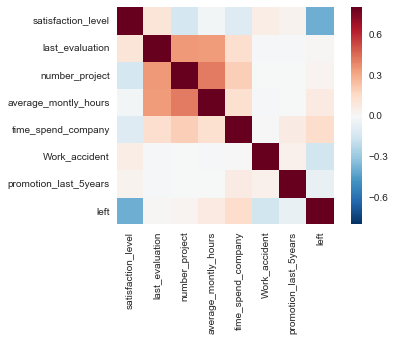

In [3]:
# visual representation of correlations using heatmap
hr_features = ['satisfaction_level','last_evaluation', 'number_project','average_montly_hours','time_spend_company','Work_accident','salary','promotion_last_5years','sales','left'] 
hr_corr = hr_df[hr_features].corr()
print(hr_corr)
sns.heatmap(hr_corr, square = True, vmax = 0.8 )


** Satisfaction_level has the most negative correlation whereas time_spend_compay has the most positive correlation to employees who left **


In [4]:
# look at each feature individually
print(hr_df.dtypes)

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


**We can see that sales and salary are objects. We can look at them in more detail** 

In [5]:
# employees by numbers: employees split by department
print("Numbers of employees: total numbers by job")
print(np.unique(hr_df.sales))
print(hr_df['sales'].value_counts())
hr_job = hr_df.groupby("sales")

print("**********")

print("Numbers of employees who left: numbers by job")
hr_job.left.sum()

Numbers of employees: total numbers by job
['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64
**********
Numbers of employees who left: numbers by job


sales
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: left, dtype: int64

In [6]:
# total number of employees by salary
print(hr_df['salary'].value_counts())
print ("_"*90)

# percentage of employees: breakdown by salary
print("percentages of employees: numbers by salary")
print('low salary: %3.2f' %((len(hr_df[hr_df.salary == "low"])/len(hr_df))*100))
print('medium salary: %3.2f' %((len(hr_df[hr_df.salary == "medium"])/len(hr_df))*100))
print('high salary: %3.2f' %((len(hr_df[hr_df.salary == "high"])/len(hr_df))*100))
print ("_"*90)

# total number of employees who left as a percentage
print('Numbers and percentages of employees who left')
emp_left = hr_df[hr_df.left == 1]
print(emp_left.shape)
perc_left = ((len(hr_df[hr_df.left == 1])/len(hr_df))*100)
print('percentage of employees who left: %3.2f percent' %(((len(hr_df[hr_df.left == 1])/len(hr_df))*100)))
print ("_"*90)

print(emp_left['salary'].value_counts())
print ("_"*90)

# percentage of employees who left: breakdown by salary
print('low salary: %3.2f' %((len(emp_left[emp_left.salary == "low"])/len(emp_left))*100))
print('medium salary: %3.2f' %((len(emp_left[emp_left.salary == "medium"])/len(emp_left))*100))
print('high salary: %3.2f' %((len(emp_left[emp_left.salary == "high"])/len(emp_left))*100))

low       7316
medium    6446
high      1237
Name: salary, dtype: int64
__________________________________________________________________________________________
percentages of employees: numbers by salary
low salary: 48.78
medium salary: 42.98
high salary: 8.25
__________________________________________________________________________________________
Numbers and percentages of employees who left
(3571, 10)
percentage of employees who left: 23.81 percent
__________________________________________________________________________________________
low       2172
medium    1317
high        82
Name: salary, dtype: int64
__________________________________________________________________________________________
low salary: 60.82
medium salary: 36.88
high salary: 2.30


**Out of 14999 employees, 3571 left. We can now analyse the data for these employees in more detail**

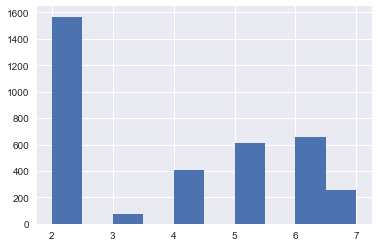

In [7]:
emp_left.number_project.hist()

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.182295       -0.227113   
last_evaluation                  0.182295         1.000000        0.804155   
number_project                  -0.227113         0.804155        1.000000   
average_montly_hours            -0.084117         0.830336        0.875194   
time_spend_company               0.446440         0.783873        0.601989   
Work_accident                    0.005864        -0.001875       -0.008401   
promotion_last_5years            0.005516        -0.047992       -0.032301   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.084117            0.446440   
last_evaluation                    0.830336            0.783873   
number_project                     0.875194            0.601989   
average_montly_hours               1.000000            0.664011   
time_spend_company                 0.664

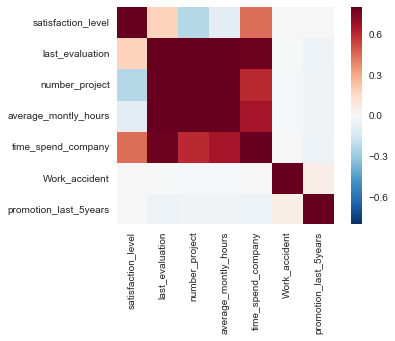

In [8]:
# visual representation of correlations using heatmap
left_features = ['satisfaction_level','last_evaluation', 'number_project','average_montly_hours','time_spend_company','Work_accident','salary','promotion_last_5years','sales'] 
left_corr = emp_left[left_features].corr()
print(left_corr)
sns.heatmap(left_corr, square = True, vmax = 0.8 )

Very clearly, from the above heatmap, there is a negative correlation between satisfaction level and
* number_projects
* average_monthly_hours

However, we can see that satisfaction increases with time_spend_company and last_evaluation.

Since employees who leave have a negative correlation with satisfaction level and from previous observations, we can conlude that:
* As number of projects increase, so does average monthly hours and hence satisfaction decreses. However, we can also notice that evaluation is higher when employees are on mulitple projects and spend more hours. 
* More employees on low salary leave compared to higher salary. Maybe salary can be a motivation
